### 回归树基本所有参数和分类树一致，但是回归树中没有标签是否均衡问题,因此没有class_weight这样的权重参数

### 1.回归树的criterion

In [1]:
# 输入"mes"使用均方误差mean squared error(MSE),父节点和叶子节点之间的均方误差被用来作为特征选择的标准，这种方法通过使用叶子节点的均值
#来最小化L2损失
#输入"friedman_mes"使用费厄德曼误差均方误差，这种指标费厄德曼针对潜在分支中改进后的均方误差
#输入"mas"绝对平均误差这种方法通过使用叶子节点的中值来最小化L1损失

### 交叉验证

In [2]:
#交叉验证是用来验证模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份作为训练集，多次计算模型的精度性来评估
#模型的准确程度.训练集和测试集的划分会干扰模型的结果，因此用交叉验证n次的结果求出平均值，是对模型效果的一个更好的度量.

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)#实例化回归树
cross_val_score(regressor
                ,boston.data
                ,boston.target
                ,cv=10
                ,scoring="neg_mean_squared_error")
#交叉验证,regressor表示实例化好的回归树，也可以是其他模型，cv表示分成十份,scoring="neg_mean_squared_error"返回负均方误差(均方误差的负数),
#scoring="neg_mean_squared_error"不填则返回R平方也就是分类树中的score评分小于1.

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -43.57745098, -12.2148    , -95.2186    ,
       -57.764     , -37.9534    ])

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [6]:
rng=np.random.RandomState(1)#生成随机数种子
x=np.sort(5*rng.rand(80,1),axis=0) 
#rng.rand(80,1)生成80行一列0到1之间的随机数,训练集和测试集必须是二维所以不直接rng.rand(80)
#np.sort()排序
y=np.sin(x).ravel() #标签是一维的,所以要平坦化降维
#np.random.rand() 生成随机数组的函数
y

array([ 5.71874056e-04,  9.13140084e-02,  9.66835240e-02,  1.36510390e-01,
        1.94035253e-01,  2.47178482e-01,  2.63658285e-01,  4.12522163e-01,
        4.45464463e-01,  4.72155294e-01,  4.89635918e-01,  4.93517994e-01,
        6.05300129e-01,  6.34509327e-01,  6.41446076e-01,  6.45696215e-01,
        6.69579781e-01,  6.69681218e-01,  7.35748344e-01,  7.50720534e-01,
        8.02397078e-01,  8.36304301e-01,  8.53289303e-01,  8.71444956e-01,
        9.70605329e-01,  9.85824622e-01,  9.91311217e-01,  9.94728365e-01,
        9.98252126e-01,  9.99993246e-01,  9.99977003e-01,  9.87699652e-01,
        9.85915646e-01,  9.15904395e-01,  9.14069859e-01,  8.77830014e-01,
        8.77534605e-01,  8.70630546e-01,  8.69934082e-01,  8.65235592e-01,
        8.60400242e-01,  7.84646075e-01,  6.31686553e-01,  5.37227991e-01,
        4.58019714e-01,  4.45838347e-01,  4.32721158e-01,  3.41153283e-01,
        2.67699531e-01,  2.07303185e-01,  1.93830272e-01, -1.76451855e-01,
       -2.09188375e-01, -

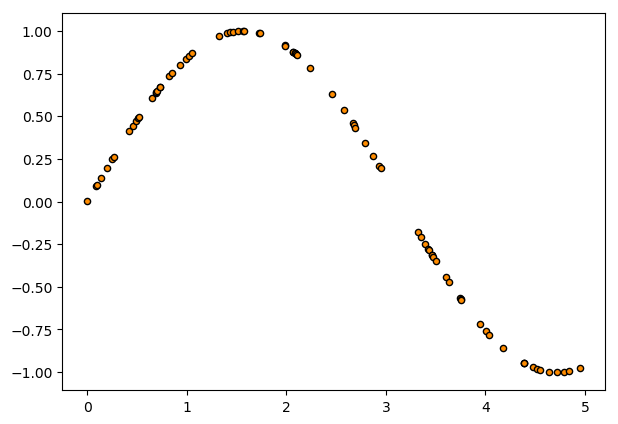

In [7]:
plt.figure(figsize=(7,5),dpi=100)
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.show()

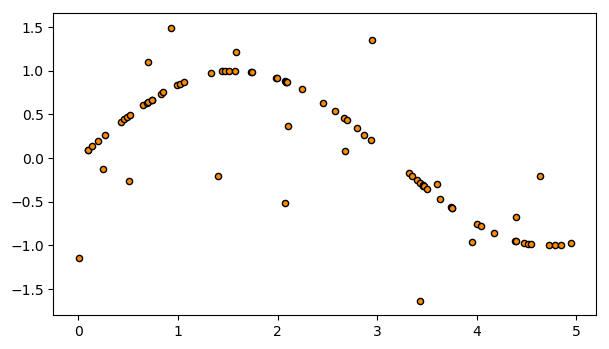

In [8]:
y[::5] += 3*(0.5-rng.rand(16))#加入噪声
plt.figure(figsize=(7,4),dpi=100)
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.show()

In [9]:
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)
regr_1.fit(x,y)
regr_2.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
x_test=np.arange(0.0,5.2,0.1)[:,np.newaxis] #n[:,np.newaxis]每1个元素切为一个新的[元素]，升维 作用可同于  reshape()
y_1=regr_1.predict(x_test)
y_2=regr_2.predict(x_test)
print(y_1)
print(y_2)

[ 0.05236068  0.05236068  0.05236068  0.05236068  0.05236068  0.05236068
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568 -0.45190264 -0.45190264 -0.45190264 -0.45190264
 -0.45190264 -0.45190264 -0.45190264 -0.86864256 -0.86864256 -0.86864256
 -0.86864256 -0.86864256 -0.86864256 -0.86864256 -0.86864256 -0.86864256
 -0.86864256 -0.86864256 -0.86864256 -0.86864256]
[-1.1493464   0.07894101  0.07894101  0.39845005  0.39845005  0.39845005
  0.80884013  0.80884013  0.80884013  0.80884013  0.80884013  0.80884013
  0.80884013  0.80884013 -0.20183403  1.02480053  1.02480053  1.02480053
  1.02480053  0.91498713  0.91498713  0.5424728   0.5424728   0.5424728
  0.5424728   0.5424728   0.5424728   0.5424728   0.5424728   0.5424728
  1

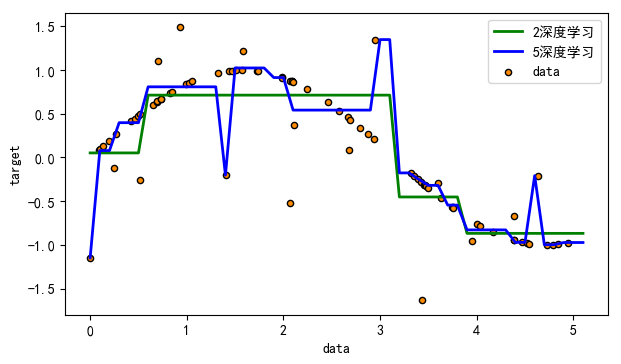

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7,4),dpi=100)
plt.scatter(x,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(x_test,y_1,c='green',label='2深度学习',linewidth=2)
plt.plot(x_test,y_2,c='blue',label='5深度学习',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

### 泰坦尼克号生者预测

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [13]:
f=open(r"D:/数据分析题目/数据集/01 决策树课件数据源码/data.csv")
data=pd.read_csv(f)

In [14]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
k=data[data.duplicated()]#看重复值；
k

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [22]:
# data.drop(data[data.isnull()])
data.dropna(subset=['Age','Embarked'],axis=0,how='any',inplace=True)

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
labels=data['Embarked'].unique().tolist()
data['Embarked']=data['Embarked'].apply(lambda x:labels.index(x)) #因为用回归树额不是分类树所以转换成数字

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [35]:
data.loc[:,'Sex']=(data['Sex']=='male').astype("int")
#data['Sex']=='male'返回True.False，然后int(True)为1,int(False)为0，所以.astype("int")转化为数字型True为1,false为0
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [37]:
data_test_x=data.iloc[:,data.columns!='Embarked']
data_test_x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [38]:
data_test_y=data.iloc[:,data.columns=='Embarked']
data_test_y.head()

,Embarked
0,0
1,1
2,0
3,0
4,0


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data_test_x,data_test_y,test_size=0.3)

In [46]:
xtrain.Sex.unique()

array([0, 1], dtype=int64)

In [47]:
xtrain.shape

(498, 8)

In [48]:
#因为索引混乱，调回来
for i in [xtrain,ytrain,xtest,ytest]:
    i.index=range(i.shape[0])

In [49]:
ytrain.head(10)

,Embarked
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,1
9,0


In [61]:
clf=DecisionTreeClassifier(random_state=30)
clf=clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)

In [62]:
score#分数不高

0.7336448598130841

In [63]:
#使用交叉验x,data_test_y,cv=10
score=cross_val_score(clf,data_test_x,data_test_y,cv=10).mean()
score#分数也不是太高，选择调参

0.8158467471495641

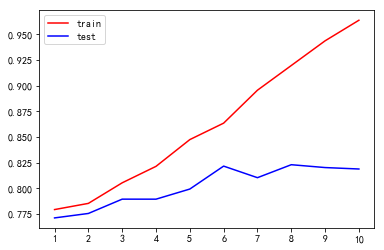

In [64]:
tr=[]
te=[]
for i in range(10):
    clf=DecisionTreeClassifier(random_state=30
                               ,max_depth=i+1
#                                ,criterion="entropy"
                              )
    clf=clf.fit(xtrain,ytrain)
    score_tr=clf.score(xtrain,ytrain)
    score_te=cross_val_score(clf,data_test_x,data_test_y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
plt.plot(range(1,11),tr,color='red',label="train")
plt.plot(range(1,11),te,color='blue',label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()#训练集比测试集准确度高太多，完全过拟合

In [ ]:
#网格搜索,同时调多个参数的技术,枚举技术
#parameters本质是一串参数，和这些参数对应的我们所希望的网格搜索来搜索参数的取值范围
gini_threholds=np.linspace(0,0.5,20)
parameters={"criterion":('gini','entropy')
            ,"splitter":('best','random')
            ,'max_depth':[*range(1,10)]
            ,'min_samples_leaf':[*range(1,50,5)]
            ,'min_impurity_decrease':[*gini_threholds]
           }
clf=DecisionTreeClassifier(random_state=25)
GS=GridSearchCV(clf,parameters,cv=10)
GS.fit(xtrain,ytrain)

In [ ]:
GS.best_params_#从我们输入的参数和参数取值中，返回最佳组合

In [ ]:
GS.best_score_#网格搜索后的模型的评判标准